Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('amazon_alexa.csv')

In [4]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [6]:
data.shape

(3150, 5)

In [7]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [10]:
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [11]:
data.corr()

,rating,feedback
rating,1.000000,0.861968
feedback,0.861968,1.000000


In [12]:
feedbacks = data['feedback'].value_counts()
print((feedbacks))

1    2893
0     257
Name: feedback, dtype: int64


In [14]:
data0 = data[data['feedback']==0]
data1 = data[data['feedback']==1]

In [15]:
data0.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


In [16]:
data1.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [17]:
fdata = pd.concat([data0,data1])

In [18]:
fdata.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


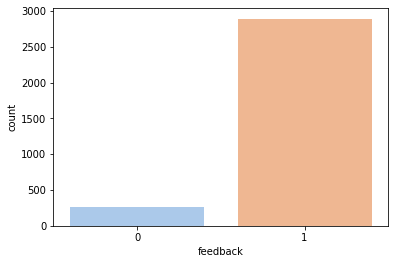

In [19]:
sns.set_palette("pastel")
sns.countplot(fdata['feedback'])

In [20]:
import plotly.offline as py
import plotly.graph_objs as go

In [21]:
ratings = data['rating'].value_counts()

In [22]:
print(ratings)

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


In [23]:
labels = ratings.index
values = ratings.values

In [24]:
piechart = go.Pie(labels = labels,
                         values = values,
                         name = 'Alexa Ratings')
df = [piechart]
layout = go.Layout(title = 'Distribution of Ratings for Alexa')
fig = go.Figure(data = df,layout=layout)
py.iplot(fig)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.preprocessing import OneHotEncoder as ohe
from sklearn.compose import ColumnTransformer as ct

In [29]:
transformer=ct(transformers=[('review_counts',cv(),'verified_reviews'), 
                             ('variation_dummies', ohe(),['variation'])
                            ],remainder='passthrough')

In [30]:
from sklearn.pipeline import make_pipeline as mp
from sklearn.tree import DecisionTreeClassifier as dtc

In [31]:
pipe= mp(transformer,dtc(random_state=2))
pipe

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [32]:
from sklearn.model_selection import train_test_split 

In [36]:
X = data[['rating','variation','verified_reviews']].copy()
Y = data.feedback

In [37]:
X.head(3)

,rating,variation,verified_reviews
0,5,Charcoal Fabric,Love my Echo!
1,5,Charcoal Fabric,Loved it!
2,4,Walnut Finish,"Sometimes while playing a game, you can answer..."


In [38]:
Y.head(3)

0    1
1    1
2    1
Name: feedback, dtype: int64

In [39]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.3,random_state=15,stratify=y)

In [40]:
pipe.fit(Xtrain,Ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [42]:
Ypred=pipe.predict(Xtest)

In [46]:
df = pd.DataFrame(Ypred, Ytest)

In [47]:
df.head()

,0
feedback,
1,1
1,1
1,1
1,1
1,1


In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [49]:
accuracy_score(Ytest,Ypred)

1.0

In [52]:
cm = confusion_matrix(Ytest,Ypred)
print(cm)

[[ 77   0]
 [  0 868]]


In [53]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [68]:
pipe= mp(transformer, rfc(n_estimators=120, random_state=5))
pipe.fit(Xtrain,Ytrain)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('review_counts',
                                                  CountVectorizer(analyzer='word',
                                                                  binary=False,
                                                                  decode_error='strict',
                                                                  dtype=<class 'numpy.int64'>,
                                                                  encoding='utf-8',
                                                                  input='content',
                                                                  lowercase=True,
                                                                  max_df=1.0,
        

In [69]:
Ypred=pipe.predict(Xtest)

In [70]:
accuracy_score(Ytest,Ypred)

0.9968253968253968

In [71]:
cm = confusion_matrix(Ytest,Ypred)
print(cm)

[[ 74   3]
 [  0 868]]
